In [1]:
!pip install tweepy

In [2]:
!pip install pandas


In [3]:
!pip install numpy


In [4]:
!pip install matplotlib


In [5]:
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt


In [6]:
auth = tw.OAuthHandler("jwc6IYlv3HEfIzcRhu4K7GUT1", "AWD0d3aRKt3HHfAPe3oV8xnq2MIvL1zFlWX0Sa0Xm1g6hmjdZX")
auth.set_access_token("1335153296365875201-KGvNr9iJNqjITaz0lBL2STQfnMhqnT", "hpUawKvoOgKcDNzZ1ToDFrs4wbBWoFJveOintgGzrUx7e")


api = tw.API(auth)

In [7]:
hashtag = "#presidentialdebate"
query = tw.Cursor(api.search_tweets, q=hashtag).items(10000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': "RT @DwayneFuhlhage: Of course my $0.99 Trump necktie was made in China, just like Ivanka's purses and clothing. #PresidentialDebate https:/…", 'Timestamp': datetime.datetime(2022, 6, 5, 19, 32, 16, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialDebate 10/22/2020 BelmontUniv #debate,#Debates2020 \nhttps://t.co/IxTYG359i2\nnewsmax MotherJone…', 'Timestamp': datetime.datetime(2022, 6, 5, 13, 56, 6, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @WSjp_insight: 3rd US #PresidentialDebate articles https://t.co/64dClOHu2m BerkeleyISchool Center4Politics YouGovUS KelloggSchool cage_w…', 'Timestamp': datetime.datetime(2022, 6, 5, 13, 55, 55, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @WSjp_insight: 1st US #PresidentialDebate 09/29/2020\n🇺🇸#Debates2020 #TrumpBidenDebate\nhttps://t.co/DfBnubTidB\nPBS,NewsHour CBSNews NBCPo…', 'Timestamp': datetime.datetime(2022, 6, 5, 13, 47, 6, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @WSjp_insight: 2nd

In [8]:
df = pd.DataFrame.from_dict(tweets)
df.head()


,Tweet,Timestamp
0,RT @DwayneFuhlhage: Of course my $0.99 Trump n...,2022-06-05 19:32:16+00:00
1,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2022-06-05 13:56:06+00:00
2,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2022-06-05 13:55:55+00:00
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-05 13:47:06+00:00
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2022-06-05 13:46:50+00:00


In [9]:
trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [10]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweet,Timestamp,Trump,Biden
0,RT @DwayneFuhlhage: Of course my $0.99 Trump n...,2022-06-05 19:32:16+00:00,1,0
1,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2022-06-05 13:56:06+00:00,0,0
2,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2022-06-05 13:55:55+00:00,0,0
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-05 13:47:06+00:00,1,1
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2022-06-05 13:46:50+00:00,0,0
5,The 5th is presenting his credentials for the ...,2022-06-05 05:52:14+00:00,0,0
6,RT @whitney_stesher: Sisi tunajua president we...,2022-06-05 02:28:16+00:00,0,0
7,RT @jaydiggsmusic: Jay Diggs with his new smas...,2022-06-05 02:04:14+00:00,0,0
8,Who will you vote in August 2022\n#presidentia...,2022-06-04 20:19:47+00:00,0,0
9,RT @duncanHustlerNa: I Will Obviously RESPECT ...,2022-06-04 17:57:09+00:00,0,0


In [11]:
!pip install nltk


In [12]:
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

ModuleNotFoundError: No module named 'textblob'

In [13]:
!pip install textblob

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to C:\Users\Iranna
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Iranna
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [15]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in stop_words])
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in custom_stopwords])
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

NameError: name 'Word' is not defined

In [16]:
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to C:\Users\Iranna
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Iranna
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in stop_words])
    processed_tweet = " ".join([word for word in processed_tweet.split() if word not in custom_stopwords])
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Trump,Biden,Processed Tweet
0,RT @DwayneFuhlhage: Of course my $0.99 Trump n...,2022-06-05 19:32:16+00:00,1,0,@DwayneFuhlhage: Of course $0.99 Trump necktie...
1,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2022-06-05 13:56:06+00:00,0,0,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...
2,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2022-06-05 13:55:55+00:00,0,0,@WSjp_insight: 3rd US article https://t.co/64d...
3,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2022-06-05 13:47:06+00:00,1,1,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...
4,RT @WSjp_insight: 2nd US #PresidentialDebate a...,2022-06-05 13:46:50+00:00,0,0,@WSjp_insight: 2nd US article https://t.co/3ui...


In [19]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])


Base review
 RT @DwayneFuhlhage: Of course my $0.99 Trump necktie was made in China, just like Ivanka's purses and clothing. #PresidentialDebate https:/…

------------------------------------

Cleaned and lemmatized review
 @DwayneFuhlhage: Of course $0.99 Trump necktie made China, like Ivanka's purse clothing. https:/…


In [20]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].head()

,Processed Tweet,Biden,Trump,polarity,subjectivity
0,@DwayneFuhlhage: Of course $0.99 Trump necktie...,0,1,0.0,0.0
1,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...,0,0,0.0,0.0
2,@WSjp_insight: 3rd US article https://t.co/64d...,0,0,0.0,0.0
3,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...,1,1,0.0,0.0
4,@WSjp_insight: 2nd US article https://t.co/3ui...,0,0,0.0,0.0


In [21]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Trump                                                        
1          0.0  0.0  0.0    0.0          0.0  0.0  0.0    0.0

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Biden                                                        
1          0.0  0.0  0.0    0.0          0.0  0.0  0.0    0.0

In [22]:
biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

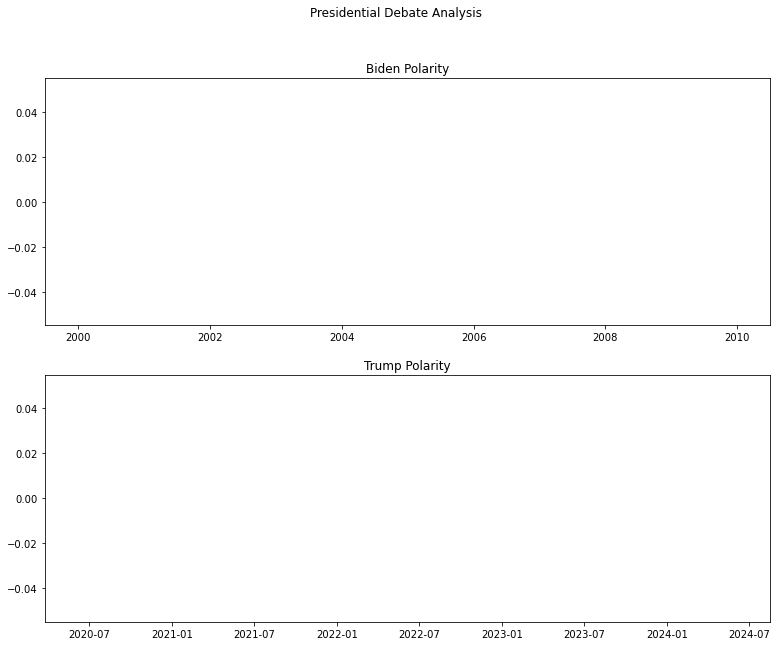

In [23]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()